In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#df=pd.read_excel("Muestra Proyecto Socios Formadores.xlsx")
df=pd.read_csv("DataTiempos.csv")

In [3]:
df.head()

,Sucursal,EstudioModalidad,ReservacionSP,TEPFechaEspera,TEPHoraInicio,TEPHoraFin,TEPMinutos,TAPFechaAtencion,TAPHoraInicio,TAPHoraFin,TAPMinutos
0,COYOACAN,DENSITOMETRIA,806115606,20250302,2025-03-02 13:20:00,2025-03-02T11:40:15.1130000,0.00,20250302,2025-03-02T11:40:15.1130000,2025-03-02T11:47:18.1700000,7.05
1,COYOACAN,DENSITOMETRIA,918870299,20250329,2025-03-29 07:11:15.77,2025-03-29T07:39:49.4000000,28.57,20250329,2025-03-29T07:39:49.4000000,2025-03-29T07:45:18.2300000,5.48
2,COYOACAN,DENSITOMETRIA,921436045,20250321,2025-03-21 15:55:53.723,2025-03-21T16:15:07.2300000,19.23,20250321,2025-03-21T16:15:07.2300000,2025-03-21T16:21:50.1270000,6.72
3,COYOACAN,DENSITOMETRIA,923595474,20250301,2025-03-01 08:03:01.36,2025-03-01T09:42:16.9900000,99.25,20250301,2025-03-01T09:42:16.9900000,2025-03-01T09:48:03.5770000,5.78
4,COYOACAN,DENSITOMETRIA,926170090,20250302,2025-03-02 09:40:00,2025-03-02T09:20:46.2400000,0.00,20250302,2025-03-02T09:20:46.2400000,2025-03-02T09:27:47.6170000,7.02


In [4]:
df=df.rename(columns={"ReservacionSP":"Clave servicio realizado",
                      "EstudioModalidad":"Servicio realizado",
                      "TEPFechaEspera":"Fecha",
                      "TEPHoraInicio":"Hora inicio de espera",
                      "TEPHoraFin":"Hora fin de espera",
                      "TEPMinutos":"Minutos de espera",
                      "TAPFechaAtencion":"Fecha tiempo de atencion",
                      "TAPHoraInicio":"Hora inicio de atencion",
                      "TAPHoraFin":"Hora fin de atencion",
                      "TAPMinutos":"Minutos de atencion",})
df=df.dropna()



In [5]:
df.head()

,Sucursal,Servicio realizado,Clave servicio realizado,Fecha,Hora inicio de espera,Hora fin de espera,Minutos de espera,Fecha tiempo de atencion,Hora inicio de atencion,Hora fin de atencion,Minutos de atencion
0,COYOACAN,DENSITOMETRIA,806115606,20250302,2025-03-02 13:20:00,2025-03-02T11:40:15.1130000,0.00,20250302,2025-03-02T11:40:15.1130000,2025-03-02T11:47:18.1700000,7.05
1,COYOACAN,DENSITOMETRIA,918870299,20250329,2025-03-29 07:11:15.77,2025-03-29T07:39:49.4000000,28.57,20250329,2025-03-29T07:39:49.4000000,2025-03-29T07:45:18.2300000,5.48
2,COYOACAN,DENSITOMETRIA,921436045,20250321,2025-03-21 15:55:53.723,2025-03-21T16:15:07.2300000,19.23,20250321,2025-03-21T16:15:07.2300000,2025-03-21T16:21:50.1270000,6.72
3,COYOACAN,DENSITOMETRIA,923595474,20250301,2025-03-01 08:03:01.36,2025-03-01T09:42:16.9900000,99.25,20250301,2025-03-01T09:42:16.9900000,2025-03-01T09:48:03.5770000,5.78
4,COYOACAN,DENSITOMETRIA,926170090,20250302,2025-03-02 09:40:00,2025-03-02T09:20:46.2400000,0.00,20250302,2025-03-02T09:20:46.2400000,2025-03-02T09:27:47.6170000,7.02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105824 entries, 0 to 109166
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Sucursal                  105824 non-null  object 
 1   Servicio realizado        105824 non-null  object 
 2   Clave servicio realizado  105824 non-null  int64  
 3   Fecha                     105824 non-null  int64  
 4   Hora inicio de espera     105824 non-null  object 
 5   Hora fin de espera        105824 non-null  object 
 6   Minutos de espera         105824 non-null  float64
 7   Fecha tiempo de atencion  105824 non-null  int64  
 8   Hora inicio de atencion   105824 non-null  object 
 9   Hora fin de atencion      105824 non-null  object 
 10  Minutos de atencion       105824 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 9.7+ MB


In [7]:
df.describe()

,Clave servicio realizado,Fecha,Minutos de espera,Fecha tiempo de atencion,Minutos de atencion
count,1.058240e+05,1.058240e+05,105824.000000,1.058240e+05,105824.000000
mean,8.696228e+08,2.025032e+07,57.249833,2.025032e+07,7.976073
std,3.325485e+08,8.927411e+00,1460.816336,8.927482e+00,56.914083
min,3.498895e+07,2.025030e+07,0.000000,2.025030e+07,-97.480000
25%,9.950898e+08,2.025031e+07,0.080000,2.025031e+07,3.280000
50%,1.000718e+09,2.025032e+07,2.630000,2.025032e+07,6.000000
75%,1.006279e+09,2.025032e+07,9.080000,2.025032e+07,9.350000
max,1.011670e+09,2.025033e+07,177096.130000,2.025033e+07,11504.100000


Base de datos completa

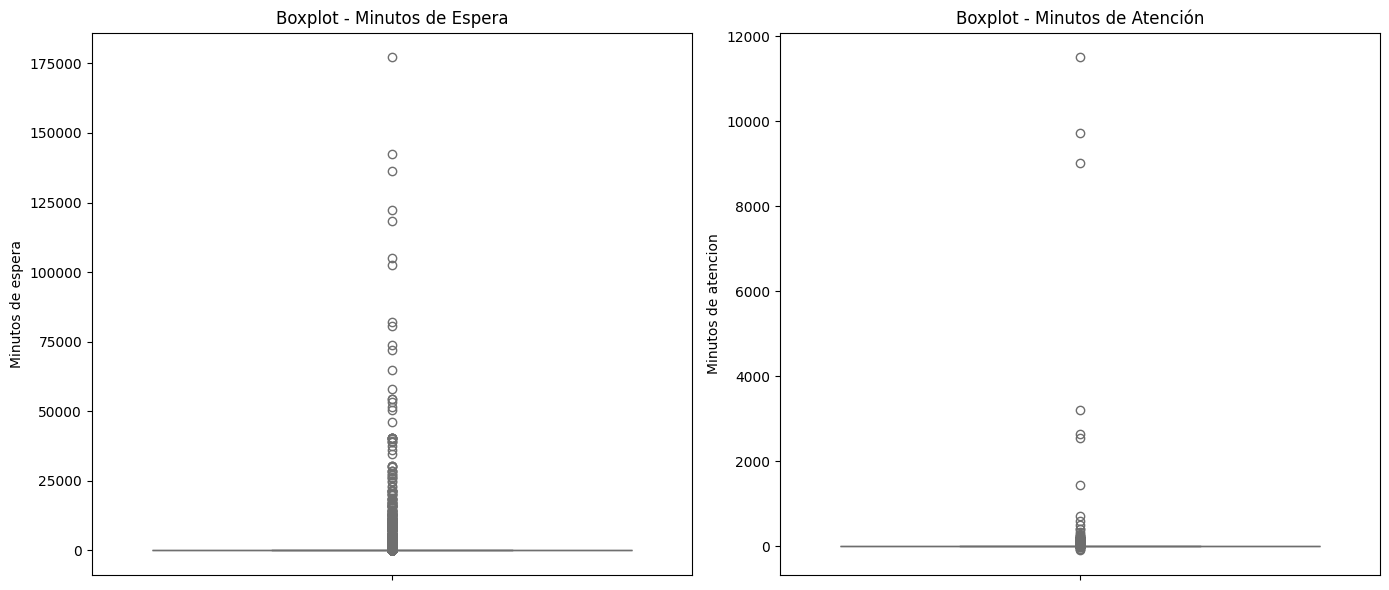

In [8]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y="Minutos de espera", color="skyblue")
plt.title("Boxplot - Minutos de Espera")

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y="Minutos de atencion", color="salmon")
plt.title("Boxplot - Minutos de Atención")

plt.tight_layout()
plt.show()

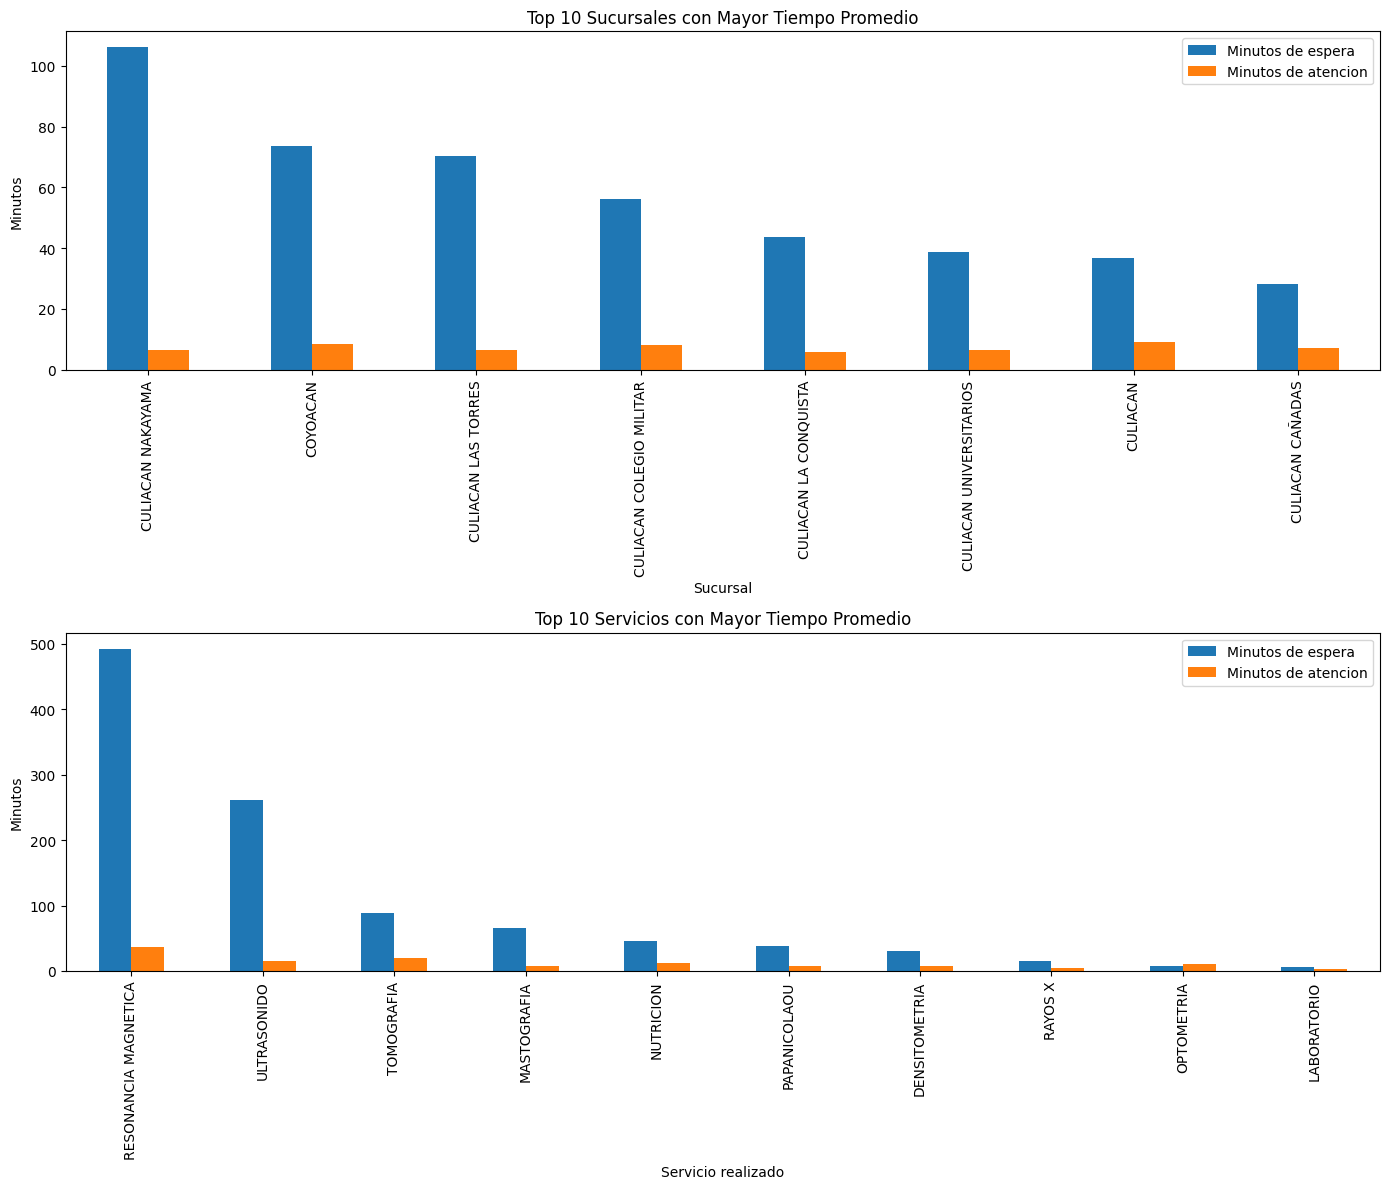

In [9]:
tiemposSucursalOr = df.groupby("Sucursal")[["Minutos de espera", "Minutos de atencion"]].mean().sort_values(by="Minutos de espera", ascending=False)
tiemposServicioOr = df.groupby("Servicio realizado")[["Minutos de espera", "Minutos de atencion"]].mean().sort_values(by="Minutos de espera", ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(14, 12))

tiemposSucursalOr.head(10).plot(kind="bar", ax=axs[0])
axs[0].set_title("Top 10 Sucursales con Mayor Tiempo Promedio")
axs[0].set_ylabel("Minutos")
axs[0].legend(loc="upper right")

tiemposServicioOr.head(10).plot(kind="bar", ax=axs[1])
axs[1].set_title("Top 10 Servicios con Mayor Tiempo Promedio")
axs[1].set_ylabel("Minutos")
axs[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

In [10]:
correlaciones = df[["Minutos de espera", "Minutos de atencion"]].corr()
print(" Matriz de correlación entre variables de tiempo:")
correlaciones

 Matriz de correlación entre variables de tiempo:


,Minutos de espera,Minutos de atencion
Minutos de espera,1.000000,0.006282
Minutos de atencion,0.006282,1.000000


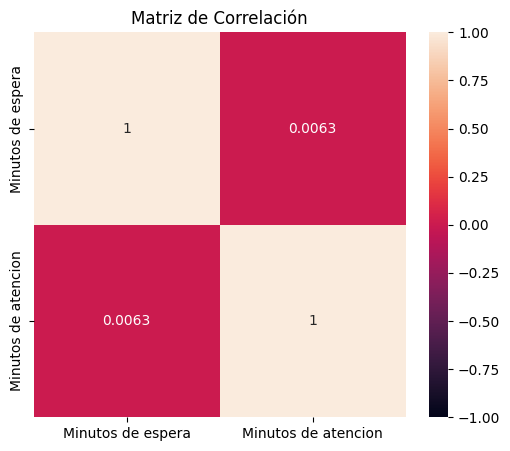

In [11]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlaciones, annot=True,  vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

In [12]:
serviciosEsperaOr = tiemposServicioOr.sort_values(by="Minutos de espera", ascending=False).head(5)
serviciosAtencionOr = tiemposServicioOr.sort_values(by="Minutos de atencion", ascending=False).head(5)
sucursalesEsperaOr = tiemposSucursalOr.sort_values(by="Minutos de espera", ascending=False).head(5)
sucursalesAtencionOr = tiemposSucursalOr.sort_values(by="Minutos de atencion", ascending=False).head(5)

print("Servicios con mayor tiempo promedio de espera:")
print(serviciosEsperaOr)

print("Servicios con mayor tiempo promedio de atención:")
print(serviciosAtencionOr)

print("Sucursales con mayor tiempo promedio de espera:")
print(sucursalesEsperaOr)

print("Sucursales con mayor tiempo promedio de atención:")
print(sucursalesAtencionOr)

Servicios con mayor tiempo promedio de espera:
                      Minutos de espera  Minutos de atencion
Servicio realizado                                          
RESONANCIA MAGNETICA         492.519561            36.112976
ULTRASONIDO                  260.542946            15.359983
TOMOGRAFIA                    88.088385            19.062311
MASTOGRAFIA                   65.246493             8.297301
NUTRICION                     45.157280            12.433075
Servicios con mayor tiempo promedio de atención:
                      Minutos de espera  Minutos de atencion
Servicio realizado                                          
RESONANCIA MAGNETICA         492.519561            36.112976
TOMOGRAFIA                    88.088385            19.062311
ULTRASONIDO                  260.542946            15.359983
NUTRICION                     45.157280            12.433075
OPTOMETRIA                     8.313357            10.280794
Sucursales con mayor tiempo promedio de espera:
  

Base de datos sin Outliers

In [13]:
dfSO= df[(df["Minutos de espera"] >= 0) & (df["Minutos de atencion"] >= 0)].copy()

C:\Users\ljcg2\AppData\Local\Temp\ipykernel_11520\332993317.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return dfSO[(df[columna] >= limite_inferior) & (dfSO[columna] <= limite_superior)]
C:\Users\ljcg2\AppData\Local\Temp\ipykernel_11520\332993317.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return dfSO[(df[columna] >= limite_inferior) & (dfSO[columna] <= limite_superior)]


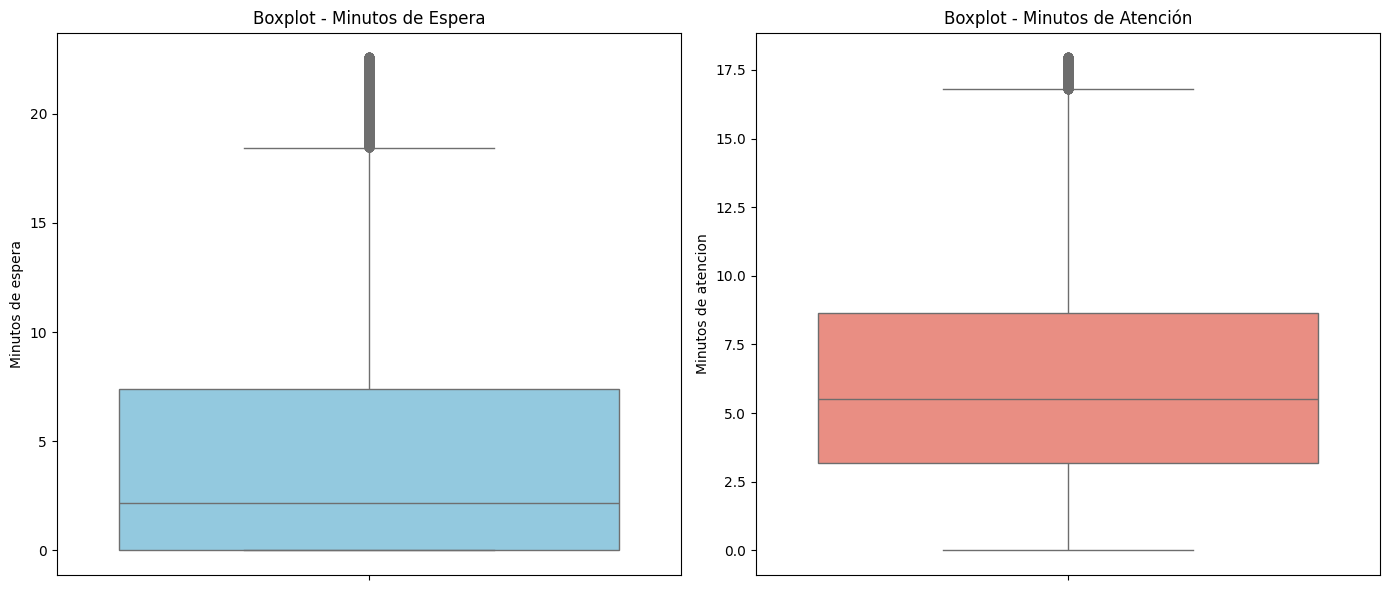

In [14]:
def eliminar_outliers(columna):
    Q1 = dfSO[columna].quantile(0.25)
    Q3 = dfSO[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return dfSO[(df[columna] >= limite_inferior) & (dfSO[columna] <= limite_superior)]

dfSO = eliminar_outliers("Minutos de espera")
dfSO = eliminar_outliers("Minutos de atencion")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=dfSO, y="Minutos de espera", color="skyblue")
plt.title("Boxplot - Minutos de Espera")

plt.subplot(1, 2, 2)
sns.boxplot(data=dfSO, y="Minutos de atencion", color="salmon")
plt.title("Boxplot - Minutos de Atención")

plt.tight_layout()
plt.show()

In [15]:
dfSO.head()

,Sucursal,Servicio realizado,Clave servicio realizado,Fecha,Hora inicio de espera,Hora fin de espera,Minutos de espera,Fecha tiempo de atencion,Hora inicio de atencion,Hora fin de atencion,Minutos de atencion
0,COYOACAN,DENSITOMETRIA,806115606,20250302,2025-03-02 13:20:00,2025-03-02T11:40:15.1130000,0.00,20250302,2025-03-02T11:40:15.1130000,2025-03-02T11:47:18.1700000,7.05
2,COYOACAN,DENSITOMETRIA,921436045,20250321,2025-03-21 15:55:53.723,2025-03-21T16:15:07.2300000,19.23,20250321,2025-03-21T16:15:07.2300000,2025-03-21T16:21:50.1270000,6.72
4,COYOACAN,DENSITOMETRIA,926170090,20250302,2025-03-02 09:40:00,2025-03-02T09:20:46.2400000,0.00,20250302,2025-03-02T09:20:46.2400000,2025-03-02T09:27:47.6170000,7.02
5,COYOACAN,DENSITOMETRIA,927239290,20250327,2025-03-27 13:44:18.37,2025-03-27T13:51:58.9400000,7.67,20250327,2025-03-27T13:51:58.9400000,2025-03-27T14:00:13.4130000,8.25
6,COYOACAN,DENSITOMETRIA,927251833,20250317,2025-03-17 16:00:00,2025-03-17T14:17:04.6430000,0.00,20250317,2025-03-17T14:17:04.6430000,2025-03-17T14:24:33.0970000,7.48


In [16]:
dfSO.describe()

,Clave servicio realizado,Fecha,Minutos de espera,Fecha tiempo de atencion,Minutos de atencion
count,9.506300e+04,9.506300e+04,95063.000000,9.506300e+04,95063.000000
mean,8.669575e+08,2.025032e+07,4.544670,2.025032e+07,6.258868
std,3.354053e+08,8.928694e+00,5.452854,8.928773e+00,3.636267
min,3.498895e+07,2.025030e+07,0.000000,2.025030e+07,0.000000
25%,9.950786e+08,2.025031e+07,0.000000,2.025031e+07,3.180000
50%,1.000728e+09,2.025032e+07,2.180000,2.025032e+07,5.530000
75%,1.006284e+09,2.025032e+07,7.380000,2.025032e+07,8.630000
max,1.011669e+09,2.025033e+07,22.580000,2.025033e+07,17.950000


In [17]:
dfSO.to_csv("Datos_Sin_Outliers.csv", index=False)

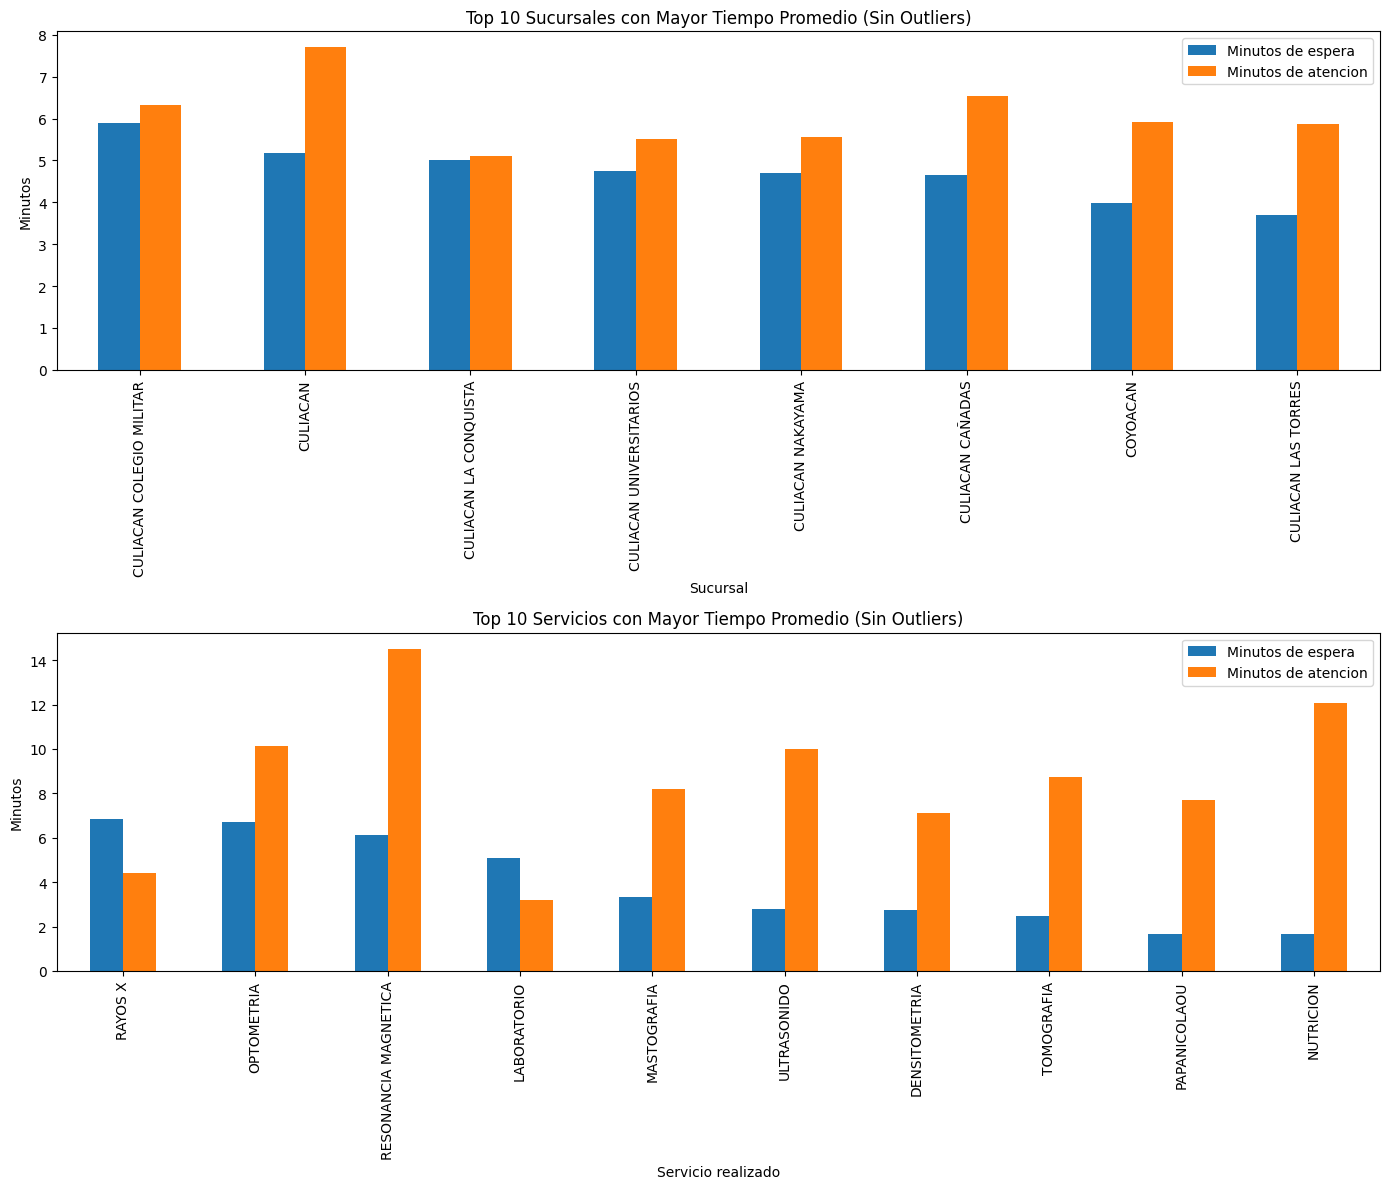

In [18]:
tiemposSucursalSO = dfSO.groupby("Sucursal")[["Minutos de espera", "Minutos de atencion"]].mean().sort_values(by="Minutos de espera", ascending=False)
tiemposServicioSO = dfSO.groupby("Servicio realizado")[["Minutos de espera", "Minutos de atencion"]].mean().sort_values(by="Minutos de espera", ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(14, 12))

tiemposSucursalSO.head(10).plot(kind="bar", ax=axs[0])
axs[0].set_title("Top 10 Sucursales con Mayor Tiempo Promedio (Sin Outliers)")
axs[0].set_ylabel("Minutos")
axs[0].legend(loc="upper right")

tiemposServicioSO.head(10).plot(kind="bar", ax=axs[1])
axs[1].set_title("Top 10 Servicios con Mayor Tiempo Promedio (Sin Outliers)")
axs[1].set_ylabel("Minutos")
axs[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

In [19]:
correlaciones = dfSO[["Minutos de espera", "Minutos de atencion"]].corr()
print(" Matriz de correlación entre variables de tiempo:")
correlaciones

 Matriz de correlación entre variables de tiempo:


,Minutos de espera,Minutos de atencion
Minutos de espera,1.000000,-0.077198
Minutos de atencion,-0.077198,1.000000


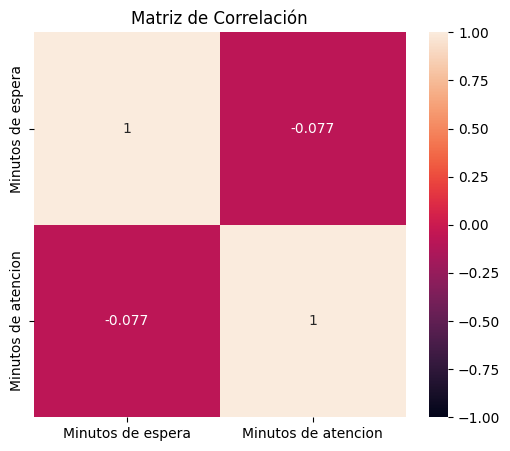

In [20]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlaciones, annot=True,  vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

In [21]:
serviciosEsperaSO = tiemposServicioSO.sort_values(by="Minutos de espera", ascending=False).head(5)
serviciosAtencionSO = tiemposServicioSO.sort_values(by="Minutos de atencion", ascending=False).head(5)
sucursalesEsperaSO = tiemposSucursalSO.sort_values(by="Minutos de espera", ascending=False).head(5)
sucursalesAtencionSO = tiemposSucursalSO.sort_values(by="Minutos de atencion", ascending=False).head(5)

print("Servicios con mayor tiempo promedio de espera:")
print(serviciosEsperaSO)

print("Servicios con mayor tiempo promedio de atención:")
print(serviciosAtencionSO)

print("Sucursales con mayor tiempo promedio de espera:")
print(sucursalesEsperaSO)

print("Sucursales con mayor tiempo promedio de atención:")
print(sucursalesAtencionSO)

Servicios con mayor tiempo promedio de espera:
                      Minutos de espera  Minutos de atencion
Servicio realizado                                          
RAYOS X                        6.828211             4.434839
OPTOMETRIA                     6.709448            10.132420
RESONANCIA MAGNETICA           6.103871            14.515242
LABORATORIO                    5.109362             3.218712
MASTOGRAFIA                    3.348152             8.205816
Servicios con mayor tiempo promedio de atención:
                      Minutos de espera  Minutos de atencion
Servicio realizado                                          
RESONANCIA MAGNETICA           6.103871            14.515242
NUTRICION                      1.670079            12.059160
OPTOMETRIA                     6.709448            10.132420
ULTRASONIDO                    2.806001             9.982160
TOMOGRAFIA                     2.491339             8.724663
Sucursales con mayor tiempo promedio de espera:
  

Espera desde los 20 minutos hasta las 4 horas (240)

In [22]:
def esperarCuatroHoras(df):
    return df[
        (df["Minutos de espera"] >= 20) & (df["Minutos de espera"] <= 240) &
        (df["Minutos de atencion"] >= 1) & (df["Minutos de atencion"] <= 1000)
    ]

dfCH = esperarCuatroHoras(df)

In [23]:
dfCH.to_csv("Datos_20Minutos_a_4Horas.csv", index=False)

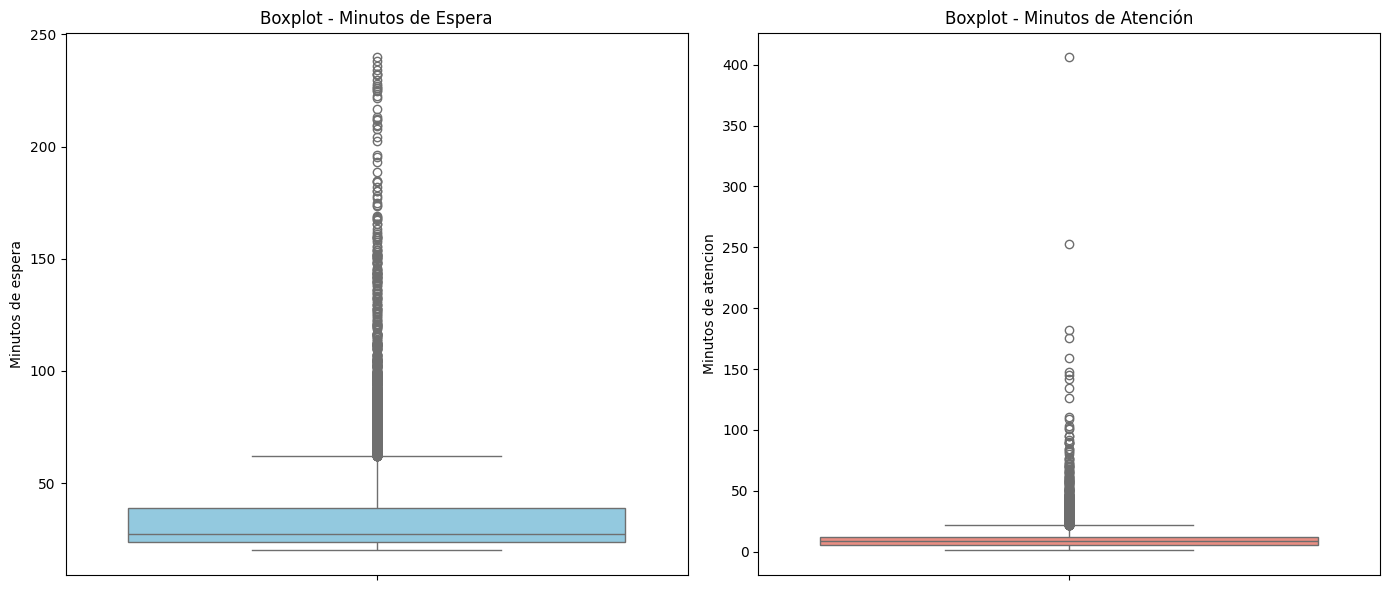

In [24]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=dfCH, y="Minutos de espera", color="skyblue")
plt.title("Boxplot - Minutos de Espera")

plt.subplot(1, 2, 2)
sns.boxplot(data=dfCH, y="Minutos de atencion", color="salmon")
plt.title("Boxplot - Minutos de Atención")

plt.tight_layout()
plt.show()

In [25]:
dfCH.head()

,Sucursal,Servicio realizado,Clave servicio realizado,Fecha,Hora inicio de espera,Hora fin de espera,Minutos de espera,Fecha tiempo de atencion,Hora inicio de atencion,Hora fin de atencion,Minutos de atencion
1,COYOACAN,DENSITOMETRIA,918870299,20250329,2025-03-29 07:11:15.77,2025-03-29T07:39:49.4000000,28.57,20250329,2025-03-29T07:39:49.4000000,2025-03-29T07:45:18.2300000,5.48
3,COYOACAN,DENSITOMETRIA,923595474,20250301,2025-03-01 08:03:01.36,2025-03-01T09:42:16.9900000,99.25,20250301,2025-03-01T09:42:16.9900000,2025-03-01T09:48:03.5770000,5.78
8,COYOACAN,DENSITOMETRIA,934119920,20250313,2025-03-13 09:26:49.497,2025-03-13T09:57:59.4700000,31.17,20250313,2025-03-13T09:57:59.4700000,2025-03-13T10:04:03.0830000,6.07
9,COYOACAN,DENSITOMETRIA,934134835,20250321,2025-03-21 11:29:26.507,2025-03-21T12:05:30.5070000,36.07,20250321,2025-03-21T12:05:30.5070000,2025-03-21T12:10:29.4970000,4.98
10,COYOACAN,DENSITOMETRIA,941437225,20250303,2025-03-03 10:16:31.21,2025-03-03T11:10:08.1730000,53.62,20250303,2025-03-03T11:10:08.1730000,2025-03-03T11:16:16.3500000,6.13


In [26]:
dfCH.describe()

,Clave servicio realizado,Fecha,Minutos de espera,Fecha tiempo de atencion,Minutos de atencion
count,7.348000e+03,7.348000e+03,7348.000000,7.348000e+03,7348.000000
mean,8.220577e+08,2.025032e+07,36.993529,2.025032e+07,10.408466
std,3.758969e+08,8.929671e+00,25.424762,8.929671e+00,11.338056
min,3.499646e+07,2.025030e+07,20.000000,2.025030e+07,1.000000
25%,9.942108e+08,2.025031e+07,23.830000,2.025031e+07,5.350000
50%,9.995577e+08,2.025032e+07,27.160000,2.025032e+07,8.520000
75%,1.005026e+09,2.025032e+07,39.120000,2.025032e+07,11.980000
max,1.011668e+09,2.025033e+07,239.680000,2.025033e+07,405.920000


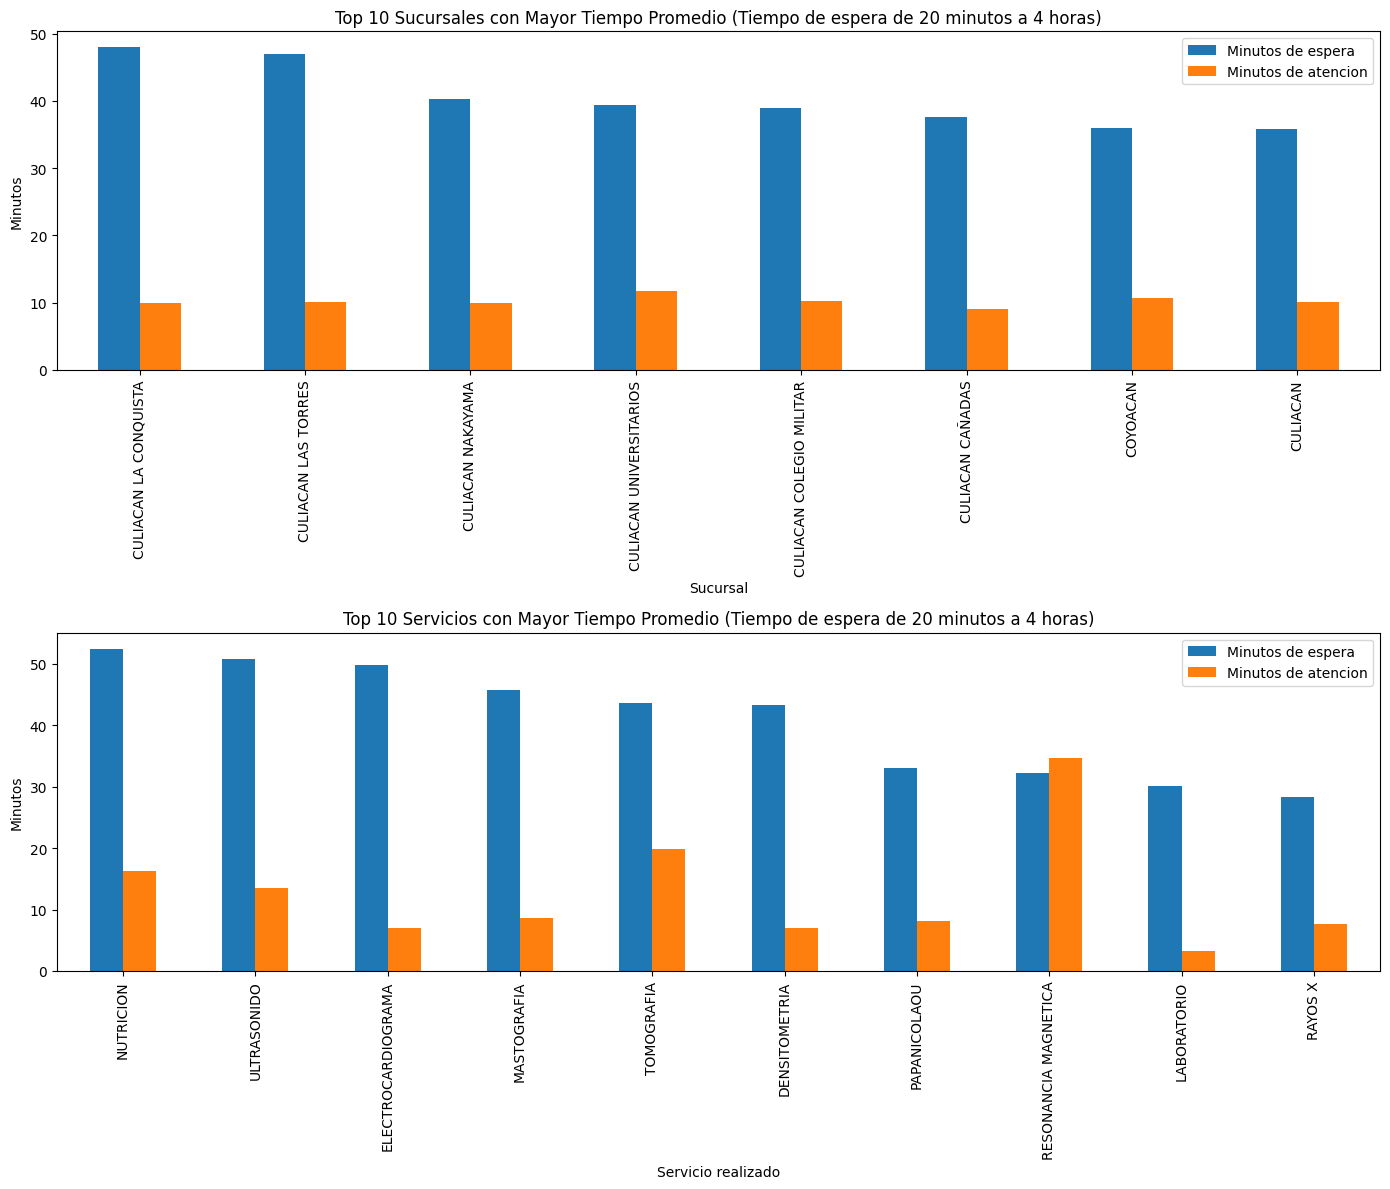

In [27]:
tiemposSucursalCH = dfCH.groupby("Sucursal")[["Minutos de espera", "Minutos de atencion"]].mean().sort_values(by="Minutos de espera", ascending=False)
tiemposServicioCH = dfCH.groupby("Servicio realizado")[["Minutos de espera", "Minutos de atencion"]].mean().sort_values(by="Minutos de espera", ascending=False)

fig, axs = plt.subplots(2, 1, figsize=(14, 12))

tiemposSucursalCH.head(10).plot(kind="bar", ax=axs[0])
axs[0].set_title("Top 10 Sucursales con Mayor Tiempo Promedio (Tiempo de espera de 20 minutos a 4 horas)")
axs[0].set_ylabel("Minutos")
axs[0].legend(loc="upper right")

tiemposServicioCH.head(10).plot(kind="bar", ax=axs[1])
axs[1].set_title("Top 10 Servicios con Mayor Tiempo Promedio (Tiempo de espera de 20 minutos a 4 horas)")
axs[1].set_ylabel("Minutos")
axs[1].legend(loc="upper right")

plt.tight_layout()
plt.show()

In [28]:
correlaciones = dfCH[["Minutos de espera", "Minutos de atencion"]].corr()
print(" Matriz de correlación entre variables de tiempo:")
correlaciones

 Matriz de correlación entre variables de tiempo:


,Minutos de espera,Minutos de atencion
Minutos de espera,1.000000,0.063983
Minutos de atencion,0.063983,1.000000


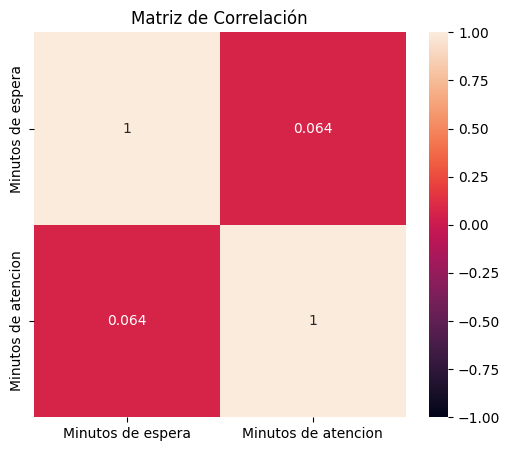

In [29]:
plt.figure(figsize=(6, 5))
sns.heatmap(correlaciones, annot=True,  vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()

In [30]:
serviciosEsperaCH = tiemposServicioCH.sort_values(by="Minutos de espera", ascending=False).head(5)
serviciosAtencionCH = tiemposServicioCH.sort_values(by="Minutos de atencion", ascending=False).head(5)
sucursalesEsperaCH = tiemposSucursalCH.sort_values(by="Minutos de espera", ascending=False).head(5)
sucursalesAtencionCH = tiemposSucursalCH.sort_values(by="Minutos de atencion", ascending=False).head(5)

print("Servicios con mayor tiempo promedio de espera:")
print(serviciosEsperaCH)

print("Servicios con mayor tiempo promedio de atención:")
print(serviciosAtencionCH)

print("Sucursales con mayor tiempo promedio de espera:")
print(sucursalesEsperaCH)

print("Sucursales con mayor tiempo promedio de atención:")
print(sucursalesAtencionCH)

Servicios con mayor tiempo promedio de espera:
                    Minutos de espera  Minutos de atencion
Servicio realizado                                        
NUTRICION                   52.482115            16.250000
ULTRASONIDO                 50.824427            13.449379
ELECTROCARDIOGRAMA          49.794242             6.940909
MASTOGRAFIA                 45.690976             8.573854
TOMOGRAFIA                  43.603776            19.845510
Servicios con mayor tiempo promedio de atención:
                      Minutos de espera  Minutos de atencion
Servicio realizado                                          
RESONANCIA MAGNETICA          32.160769            34.739744
TOMOGRAFIA                    43.603776            19.845510
NUTRICION                     52.482115            16.250000
ULTRASONIDO                   50.824427            13.449379
OPTOMETRIA                    27.319612            10.426161
Sucursales con mayor tiempo promedio de espera:
                

Identificación de patrones

In [31]:
df1 = df
df2 = dfSO
df3 = dfCH

In [32]:
print("Base de datos completa")
df1["Cumple_20min"] = df1["Minutos de espera"] <= 20

cumplimiento = df1["Cumple_20min"].mean() * 100
print(f"Porcentaje de clientes que esperaron 20 minutos o menos: {cumplimiento:.2f}%")

incumplimiento = 100 - cumplimiento
print(f"Porcentaje de clientes que esperaron más de 20 minutos: {incumplimiento:.2f}%")


Base de datos completa
Porcentaje de clientes que esperaron 20 minutos o menos: 92.13%
Porcentaje de clientes que esperaron más de 20 minutos: 7.87%


In [33]:
estudios1 = df1.groupby("Servicio realizado").apply(
    lambda x: (x["Minutos de espera"] > 20).mean() * 100
).sort_values(ascending=False)

print("Estudios con más porcentaje de espera mayor a 20 minutos:")
print(estudios1)


Estudios con más porcentaje de espera mayor a 20 minutos:
Servicio realizado
RAYOS X                 20.032002
ULTRASONIDO             19.335610
RESONANCIA MAGNETICA    12.265978
OPTOMETRIA               9.515929
MASTOGRAFIA              7.964602
TOMOGRAFIA               7.703777
DENSITOMETRIA            6.651224
NUTRICION                2.149533
LABORATORIO              0.888437
PAPANICOLAOU             0.776570
ELECTROCARDIOGRAMA       0.630969
dtype: float64


In [34]:
sucursales1 = df1.groupby("Sucursal").apply(
    lambda x: (x["Minutos de espera"] > 20).mean() * 100
).sort_values(ascending=False)

print("Sucursales con más porcentaje de espera mayor a 20 minutos:")
print(sucursales1)


Sucursales con más porcentaje de espera mayor a 20 minutos:
Sucursal
COYOACAN                    9.640178
CULIACAN                    9.083447
CULIACAN COLEGIO MILITAR    7.630279
CULIACAN UNIVERSITARIOS     6.595439
CULIACAN NAKAYAMA           4.801670
CULIACAN CAÑADAS            4.651955
CULIACAN LA CONQUISTA       4.540617
CULIACAN LAS TORRES         2.844160
dtype: float64


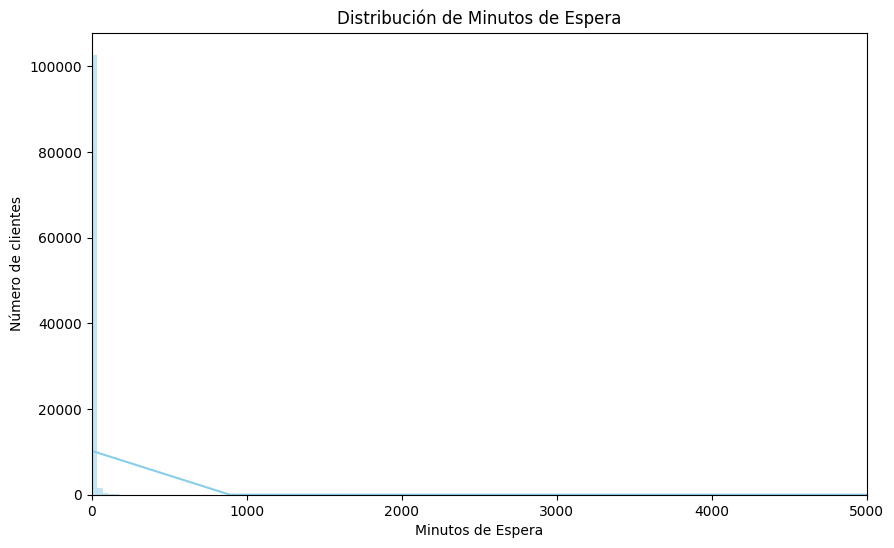

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df1["Minutos de espera"], bins=5000, kde=True, color="skyblue")
plt.title("Distribución de Minutos de Espera")
plt.xlabel("Minutos de Espera")
plt.ylabel("Número de clientes")
plt.xlim(0, 5000) 
plt.show()

In [36]:
print("Base de datos sin outliers")
df2["Cumple_20min"] = df2["Minutos de espera"] <= 20

cumplimiento = df2["Cumple_20min"].mean() * 100
print(f"Porcentaje de clientes que esperaron 20 minutos o menos: {cumplimiento:.2f}%")

incumplimiento = 100 - cumplimiento
print(f"Porcentaje de clientes que esperaron más de 20 minutos: {incumplimiento:.2f}%")

Base de datos sin outliers
Porcentaje de clientes que esperaron 20 minutos o menos: 98.74%
Porcentaje de clientes que esperaron más de 20 minutos: 1.26%


In [37]:
estudios2 = df2.groupby("Servicio realizado").apply(
    lambda x: (x["Minutos de espera"] > 20).mean() * 100
).sort_values(ascending=False)

print("Estudios con más porcentaje de espera mayor a 20 minutos:")
print(estudios2)

Estudios con más porcentaje de espera mayor a 20 minutos:
Servicio realizado
RAYOS X                 4.440172
RESONANCIA MAGNETICA    4.032258
OPTOMETRIA              2.730555
ULTRASONIDO             1.478985
DENSITOMETRIA           0.827319
MASTOGRAFIA             0.720000
TOMOGRAFIA              0.708717
NUTRICION               0.328084
LABORATORIO             0.226470
ELECTROCARDIOGRAMA      0.205620
PAPANICOLAOU            0.134168
dtype: float64


In [38]:
sucursales2 = df2.groupby("Sucursal").apply(
    lambda x: (x["Minutos de espera"] > 20).mean() * 100
).sort_values(ascending=False)

print("Sucursales con más porcentaje de espera mayor a 20 minutos:")
print(sucursales2)

Sucursales con más porcentaje de espera mayor a 20 minutos:
Sucursal
CULIACAN                    1.769417
COYOACAN                    1.508234
CULIACAN COLEGIO MILITAR    1.119023
CULIACAN UNIVERSITARIOS     0.947814
CULIACAN CAÑADAS            0.841314
CULIACAN NAKAYAMA           0.554734
CULIACAN LA CONQUISTA       0.454718
CULIACAN LAS TORRES         0.354673
dtype: float64


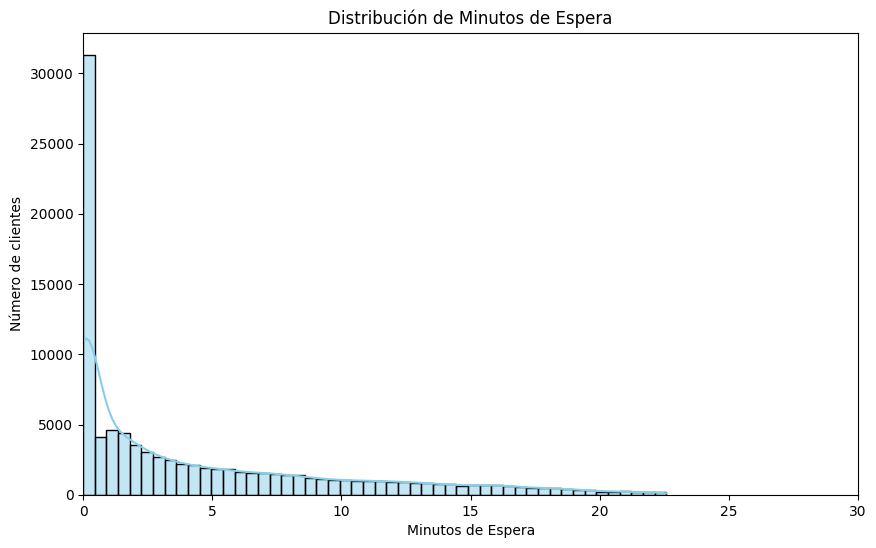

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(df2["Minutos de espera"], bins=50, kde=True, color="skyblue")
plt.title("Distribución de Minutos de Espera")
plt.xlabel("Minutos de Espera")
plt.ylabel("Número de clientes")
plt.xlim(0, 30) 
plt.show()

In [40]:
print("Base de datos con registros que van desde 20 minutos a 4 horas")
df3.loc[:, "Cumple_20min"] = df3["Minutos de espera"] <= 20
cumplimiento = df3["Cumple_20min"].mean() * 100
print(f"Porcentaje de clientes que esperaron 20 minutos o menos: {cumplimiento:.2f}%")
incumplimiento = 100 - cumplimiento
print(f"Porcentaje de clientes que esperaron más de 20 minutos: {incumplimiento:.2f}%")

Base de datos con registros que van desde 20 minutos a 4 horas
Porcentaje de clientes que esperaron 20 minutos o menos: 0.14%
Porcentaje de clientes que esperaron más de 20 minutos: 99.86%


C:\Users\ljcg2\AppData\Local\Temp\ipykernel_11520\3976340922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, "Cumple_20min"] = df3["Minutos de espera"] <= 20


In [41]:
estudios3 = df3.groupby("Servicio realizado").apply(
    lambda x: (x["Minutos de espera"] > 20).mean() * 100
).sort_values(ascending=False)

print("Estudios con más porcentaje de espera mayor a 20 minutos:")
print(estudios3)

Estudios con más porcentaje de espera mayor a 20 minutos:
Servicio realizado
ELECTROCARDIOGRAMA      100.000000
LABORATORIO             100.000000
MASTOGRAFIA             100.000000
NUTRICION               100.000000
PAPANICOLAOU            100.000000
RESONANCIA MAGNETICA    100.000000
TOMOGRAFIA              100.000000
RAYOS X                  99.959904
ULTRASONIDO              99.956294
DENSITOMETRIA            99.731903
OPTOMETRIA               99.487179
dtype: float64


In [42]:
sucursales3 = df3.groupby("Sucursal").apply(
    lambda x: (x["Minutos de espera"] > 20).mean() * 100
).sort_values(ascending=False)

print("Sucursales con más porcentaje de espera mayor a 20 minutos:")
print(sucursales3)

Sucursales con más porcentaje de espera mayor a 20 minutos:
Sucursal
CULIACAN CAÑADAS            100.000000
CULIACAN LA CONQUISTA       100.000000
CULIACAN LAS TORRES         100.000000
CULIACAN NAKAYAMA           100.000000
CULIACAN                     99.868074
CULIACAN COLEGIO MILITAR     99.856734
COYOACAN                     99.840510
CULIACAN UNIVERSITARIOS      99.814815
dtype: float64


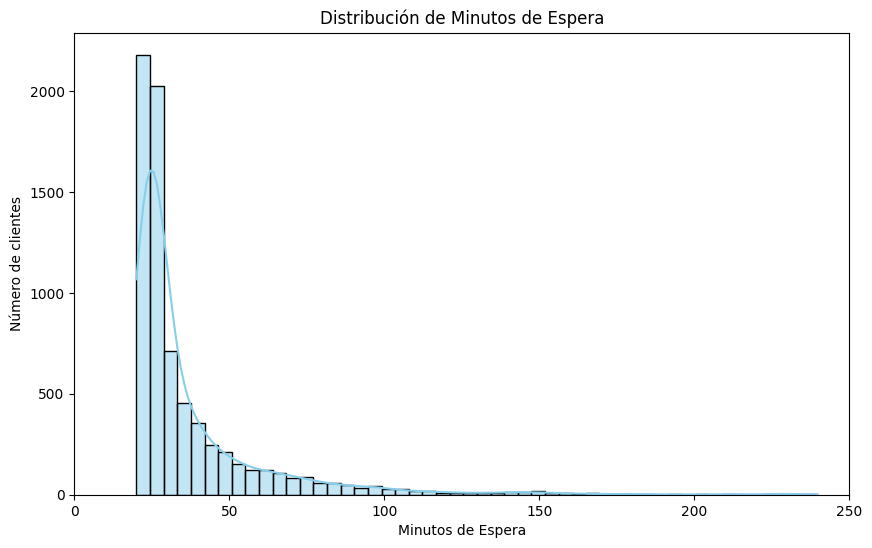

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df3["Minutos de espera"], bins=50, kde=True, color="skyblue")
plt.title("Distribución de Minutos de Espera")
plt.xlabel("Minutos de Espera")
plt.ylabel("Número de clientes")
plt.xlim(0, 250) 
plt.show()

<Axes: >

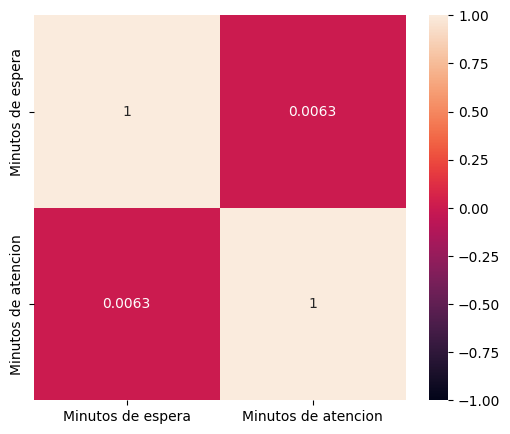

In [44]:
df1N = df1.select_dtypes(include=["number"])
df1N = df1N.drop(["Fecha", "Fecha tiempo de atencion", "Clave servicio realizado"], axis=1)
corr1 = df1N.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr1, annot=True,  vmin=-1, vmax=1)

<Axes: >

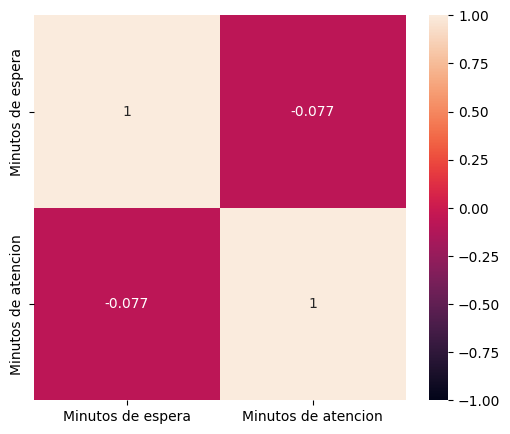

In [45]:
df2N = df2.select_dtypes(include=["number"])
df2N = df2N.drop(["Fecha", "Fecha tiempo de atencion", "Clave servicio realizado"], axis=1)
corr2 = df2N.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr2, annot=True,  vmin=-1, vmax=1)

<Axes: >

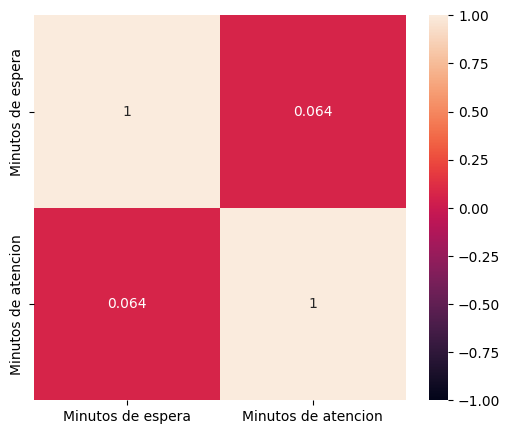

In [46]:
df3N = df3.select_dtypes(include=["number"])
df3N = df3N.drop(["Fecha", "Fecha tiempo de atencion", "Clave servicio realizado"], axis=1)
corr3 = df3N.corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr3, annot=True,  vmin=-1, vmax=1)

Arreglos adicionales de df

In [ ]:
dfP = df2 

dfP["Hora inicio de espera"] = dfP["Hora inicio de espera"].astype(str)

dfP["Hora inicio de espera limpia"] = pd.to_datetime(dfP["Hora inicio de espera"], format="%Y-%m-%d %H:%M:%S.%f", errors="coerce")

dfP.loc[dfP["Hora inicio de espera limpia"].isna(), "Hora inicio de espera limpia"] = pd.to_datetime(
    dfP.loc[dfP["Hora inicio de espera limpia"].isna(), "Hora inicio de espera"],
    format="%Y-%m-%d %H:%M:%S",
    errors="coerce"
)

dfP["Hora fin de espera"] = dfP["Hora fin de espera"].astype(str)

dfP["Hora fin de espera limpia"] = pd.to_datetime(
    dfP["Hora fin de espera"],
    format="%Y-%m-%dT%H:%M:%S.%f",
    errors="coerce"
)



df_validos = dfP[dfP["Hora fin de espera limpia"] >= dfP["Hora inicio de espera limpia"]]


df_validos.to_csv("Datos_Sin_Outliers_con_sentido.csv", index=False)


In [48]:
df_validos.head()

,Sucursal,Servicio realizado,Clave servicio realizado,Fecha,Hora inicio de espera,Hora fin de espera,Minutos de espera,Fecha tiempo de atencion,Hora inicio de atencion,Hora fin de atencion,Minutos de atencion,Cumple_20min,Hora inicio de espera limpia,Hora fin de espera limpia
2,COYOACAN,DENSITOMETRIA,921436045,20250321,2025-03-21 15:55:53.723,2025-03-21T16:15:07.2300000,19.23,20250321,2025-03-21T16:15:07.2300000,2025-03-21T16:21:50.1270000,6.72,True,2025-03-21 15:55:53.723,2025-03-21 16:15:07.230
5,COYOACAN,DENSITOMETRIA,927239290,20250327,2025-03-27 13:44:18.37,2025-03-27T13:51:58.9400000,7.67,20250327,2025-03-27T13:51:58.9400000,2025-03-27T14:00:13.4130000,8.25,True,2025-03-27 13:44:18.370,2025-03-27 13:51:58.940
7,COYOACAN,DENSITOMETRIA,932405523,20250327,2025-03-27 17:34:59.203,2025-03-27T17:35:26.7900000,0.45,20250327,2025-03-27T17:35:26.7900000,2025-03-27T17:42:17.1670000,6.85,True,2025-03-27 17:34:59.203,2025-03-27 17:35:26.790
11,COYOACAN,DENSITOMETRIA,949873663,20250331,2025-03-31 06:21:39.54,2025-03-31T06:35:20.0170000,13.68,20250331,2025-03-31T06:35:20.0170000,2025-03-31T06:40:21.4500000,5.02,True,2025-03-31 06:21:39.540,2025-03-31 06:35:20.017
16,COYOACAN,DENSITOMETRIA,977426853,20250303,2025-03-03 13:14:06.113,2025-03-03T13:23:19.9570000,9.22,20250303,2025-03-03T13:23:19.9570000,2025-03-03T13:29:15.1730000,5.93,True,2025-03-03 13:14:06.113,2025-03-03 13:23:19.957


In [49]:
dfP=df3 

dfP["Hora inicio de espera"] = dfP["Hora inicio de espera"].astype(str)

dfP["Hora inicio de espera limpia"] = pd.to_datetime(dfP["Hora inicio de espera"], format="%Y-%m-%d %H:%M:%S.%f", errors="coerce")

dfP.loc[dfP["Hora inicio de espera limpia"].isna(), "Hora inicio de espera limpia"] = pd.to_datetime(
    dfP.loc[dfP["Hora inicio de espera limpia"].isna(), "Hora inicio de espera"],
    format="%Y-%m-%d %H:%M:%S",
    errors="coerce"
)

dfP["Hora fin de espera"] = dfP["Hora fin de espera"].astype(str)

dfP["Hora fin de espera limpia"] = pd.to_datetime(
    dfP["Hora fin de espera"],
    format="%Y-%m-%dT%H:%M:%S.%f",
    errors="coerce"
)


df_validos = dfP[dfP["Hora fin de espera limpia"] >= dfP["Hora inicio de espera limpia"]]


df_validos.to_csv("Datos_20Minutos_a_4Horas_con_sentido.csv", index=False)

C:\Users\ljcg2\AppData\Local\Temp\ipykernel_11520\2765928979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP["Hora inicio de espera"] = dfP["Hora inicio de espera"].astype(str)
C:\Users\ljcg2\AppData\Local\Temp\ipykernel_11520\2765928979.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfP["Hora inicio de espera limpia"] = pd.to_datetime(dfP["Hora inicio de espera"], format="%Y-%m-%d %H:%M:%S.%f", errors="coerce")
C:\Users\ljcg2\AppData\Local\Temp\ipykernel_11520\2765928979.py:13: SettingWithCopy

In [50]:
df_validos.head()

,Sucursal,Servicio realizado,Clave servicio realizado,Fecha,Hora inicio de espera,Hora fin de espera,Minutos de espera,Fecha tiempo de atencion,Hora inicio de atencion,Hora fin de atencion,Minutos de atencion,Cumple_20min,Hora inicio de espera limpia,Hora fin de espera limpia
1,COYOACAN,DENSITOMETRIA,918870299,20250329,2025-03-29 07:11:15.77,2025-03-29T07:39:49.4000000,28.57,20250329,2025-03-29T07:39:49.4000000,2025-03-29T07:45:18.2300000,5.48,False,2025-03-29 07:11:15.770,2025-03-29 07:39:49.400
3,COYOACAN,DENSITOMETRIA,923595474,20250301,2025-03-01 08:03:01.36,2025-03-01T09:42:16.9900000,99.25,20250301,2025-03-01T09:42:16.9900000,2025-03-01T09:48:03.5770000,5.78,False,2025-03-01 08:03:01.360,2025-03-01 09:42:16.990
8,COYOACAN,DENSITOMETRIA,934119920,20250313,2025-03-13 09:26:49.497,2025-03-13T09:57:59.4700000,31.17,20250313,2025-03-13T09:57:59.4700000,2025-03-13T10:04:03.0830000,6.07,False,2025-03-13 09:26:49.497,2025-03-13 09:57:59.470
9,COYOACAN,DENSITOMETRIA,934134835,20250321,2025-03-21 11:29:26.507,2025-03-21T12:05:30.5070000,36.07,20250321,2025-03-21T12:05:30.5070000,2025-03-21T12:10:29.4970000,4.98,False,2025-03-21 11:29:26.507,2025-03-21 12:05:30.507
10,COYOACAN,DENSITOMETRIA,941437225,20250303,2025-03-03 10:16:31.21,2025-03-03T11:10:08.1730000,53.62,20250303,2025-03-03T11:10:08.1730000,2025-03-03T11:16:16.3500000,6.13,False,2025-03-03 10:16:31.210,2025-03-03 11:10:08.173
